In [1]:
# ==============================
# P02 - Requêtez des services IA
# Partie Exercice
# AI Engineer - OpenClassrooms
# ==============================

# Etape 1 configuration de l’environnement de travail

In [17]:
import sys
import os

In [18]:
# contrôle version Python, activation environnement virtuel et répertoire de travail
print("Python :", sys.version)
print("Environment :", sys.executable)
print("Working directory :", os.getcwd())

Python : 3.11.14 (main, Oct 21 2025, 18:31:21) [GCC 11.2.0]
Environment : /mnt/projects/envs/jupyterlab-central/bin/python
Working directory : /mnt/projects/ai_engineer_projects/P02/notebooks


In [19]:
# contrôle présense bibliothèques Requests, Pillow, Matplotlib, Numpy
!pip list | grep -E "requests|pillow|matplotlib|numpy"

matplotlib                3.10.8
matplotlib-inline         0.2.1
numpy                     2.4.1
pillow                    11.3.0
requests                  2.32.5


# Etape 2 obtention d’un Token API Hugging Face

In [20]:
# Test affichage des premiers caractères du Token API généré sur mon compte Hugging Face
from dotenv import load_dotenv

load_dotenv()
token = os.getenv("HF_TOKEN")
print("Token chargé :", token[:10] + "...")

Token chargé : hf_MLPwTPW...


In [21]:
# Test fonctionnement d'une requête simple vers Hugging Face
import requests

load_dotenv()
HF_TOKEN = os.getenv("HF_TOKEN")
headers = {
"Authorization": f"Bearer {HF_TOKEN}"
}
response = requests.get(
"https://huggingface.co/api/whoami-v2",
headers=headers
)
print(response.status_code)
print(response.json())

200
{'type': 'user', 'id': '69997ae129fd3795e0e4f3d0', 'name': 'VikenAI', 'fullname': 'Khatcherian', 'email': 'v.khatcherian@outlook.fr', 'emailVerified': True, 'canPay': False, 'billingMode': 'prepaid', 'periodEnd': 1772323200, 'isPro': False, 'avatarUrl': '/avatars/d03f108afcd3af72525ddb96a396f033.svg', 'orgs': [], 'auth': {'type': 'access_token', 'accessToken': {'displayName': 'OC_AI_P02_token', 'role': 'read', 'createdAt': '2026-02-21T09:34:10.509Z'}}}


# Etape 3 accéder au jeu de données d’images

In [22]:
# Vérification du dataset
base_path = "../assets/top_influenceurs_2024"

print(os.listdir(base_path))

['Mask', 'IMG']


In [23]:
# Identification du nombre de fichiers images
images_path = os.path.join(base_path, "IMG")
print(len(os.listdir(images_path)))

50


In [24]:
# Vérification présence d'un nombre identique de fichiers d'annotations (masques de segmentation)
annotations_path = os.path.join(base_path, "Mask")
print(len(os.listdir(images_path)))

50


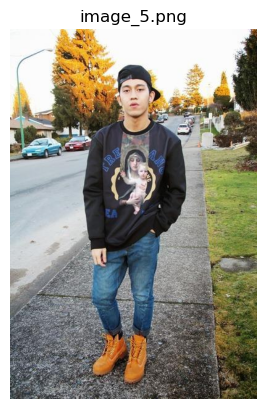

In [25]:
# Test d'affichage d'une image
from PIL import Image
import matplotlib.pyplot as plt

images_path = "../assets/top_influenceurs_2024/IMG"

image_name = os.listdir(images_path)[0]
image_path = os.path.join(images_path, image_name)

img = Image.open(image_path)

plt.imshow(img)
plt.axis("off")
plt.title(image_name)
plt.show()

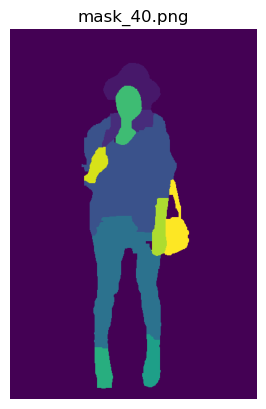

In [26]:
# Test d'affichage d'un masque d'annotations
annotations_path = "../assets/top_influenceurs_2024/Mask"

annotation_name = os.listdir(annotations_path)[0]
annotation_path = os.path.join(annotations_path, annotation_name)

msk = Image.open(annotation_path)

plt.imshow(msk)
plt.axis("off")
plt.title(annotation_name)
plt.show()

# Etape 4 développer le script d’analyse de segmentation

## Etape 4-1 Tester l'envoi d'une seule image puis la réception du résultat de l'API pour utilisation en inférence du modèle de segmentation segformer_b3_clothes

In [43]:
import numpy as np
import io

In [44]:
# chargement du token Hugging Face depuis .env

load_dotenv()
HF_TOKEN = os.getenv("HF_TOKEN")

if HF_TOKEN is None:
    raise ValueError("Le token Hugging Face n'est pas défini dans le fichier .env")

HEADERS = {"Authorization": f"Bearer {HF_TOKEN}"}

print("Token Hugging Face chargé avec succès!")

Token Hugging Face chargé avec succès!


In [45]:
# Configuration de l'url pour utilisation en inférence du modèle par l'API Hugging Face en mode serverless
API_URL = "https://router.huggingface.co/hf-inference/models/sayeed99/segformer_b3_clothes"

print(f"Ci-contre l'URL de l'API configurée: {API_URL}.")  

Ci-contre l'URL de l'API configurée: https://router.huggingface.co/hf-inference/models/sayeed99/segformer_b3_clothes.


In [46]:
# définition d'une fonction d'appel de l'API pour envoi d'une image puis identification du format de réponse reçu en retour
def predict_segmentation(image: Image.Image) -> np.ndarray:
    # Conversion en bytes de l'image
    buffer = io.BytesIO()
    image.save(buffer, format="PNG")
    image_bytes = buffer.getvalue()

    headers = {
        "Authorization": f"Bearer {HF_TOKEN}",
        "Content-Type": "image/png"
    }

    response = requests.post(
        API_URL,
        headers = headers,
        data=image_bytes,
        timeout = 60
    )

    print("Status code :", response.status_code)
    print("Content-Type :", response.headers.get("Content-Type"))

    try:
        print("JSON response preview :", response.json())
    except Exception:
        print("Raw response preview :", response.text[:500])
    

In [47]:
# test de la fonction d'appel de l'API sur une image du répertoire IMG
IMAGE_PATH = "../assets/top_influenceurs_2024/IMG/image_1.png"

print("Chargement de l'image de test...")

image = Image.open(IMAGE_PATH).convert("RGB")

print("Envoi de l'image de test vers l'API Hugging Face...")

predicted_mask = predict_segmentation(image)

Chargement de l'image de test...
Envoi de l'image de test vers l'API Hugging Face...
Status code : 200
Content-Type : application/json
JSON response preview : [{'score': 1, 'label': 'Background', 'mask': 'iVBORw0KGgoAAAANSUhEUgAAAZAAAAJYCAAAAABph+9UAAAK1UlEQVR4nO3d3ZbayBIF4eIsv/8rcy7oHvcPGIFKqtiZEVfjmbVsqI+sEjTWXK7DSP1v9QOw7wkCSxBYgsASBJYgsASBJQgsQWAJAuvP6gcwr8vnP0R/GnSJfvRfunz7Ve6zqgFyufPvQp9YBZB7HLcCn1w8yGONMUYgSfpV1hOPp/8dV/aEbFrurGcYPSHbXv5ZQxI8IS8sdNCTjJ2Qyysv/KAhSQV5cYlzREJBXl7gGJFQkNdLEckEeWd1Q0QyQd4qQ6QRSIZIJMi7K5sgEgnydgEiiSA7lpUvkghSum4g+BHpBoIXCQTZuaRwkUCQ2uWB7H6Fs0ckDmTCcqJFwkBe+rHU499lxm9yUFEgczgGWiQJBLyM80oCmRjXNghk6iJiRYJAepQDMvk1TR2RHJAmCQJLEFiCwOoLAj3Vc0CCvsG+pxyQ2SJQ4CAQ6hLOLQmkhUgUSIeybq1xxV4cTStuQq7F9604kFkkVNdAkNp1BaEOSCYIdjUnFAmyPy5pJgh3PXeXCVI4QWAJAisUZOchAj6DQkHqJggsQWClguw7BcCf4aeClE0QWILAEgSWILAEgdUUhHvd2xSEWyoI9yW+s1SQsoWClB2QVJDdYUW7gmATBJYgsDJBsCfA/jJBCicILEFgCQIrEqTwmZ4JUrmuINgvk3YFwdYUBDsgXUG4CQIrEaTyVW8kyIS4pk1B5t3Xf3ZZdwOa2X2R5ZdfXSfkUcsnR5CfLSYR5HdLRQS

In [52]:
# Réécriture de la fonction d'appel de l'API pour convertir en masque la réponse reçue 
# avec écriture préalable du dictionnaire de labels de segmentation de l'API
import base64

# mapping des labels avec un numéro d'ID
LABEL_TO_ID = {
    "Background": 0,
    "Hat": 1,
    "Hair": 2,
    "Sunglasses": 3,
    "Upper-clothes": 4,
    "Skirt": 5,
    "Pants": 6,
    "Dress": 7,
    "Belt": 8,
    "Left-shoe": 9,
    "Right-shoe": 10,
    "Face": 11,
    "Left-leg": 12,
    "Right-leg": 13,
    "Left-arm": 14,
    "Right-arm": 15,
    "Bag": 16,
    "Scarf": 17
}

In [53]:
def predict_segmentation(image: Image.Image) -> np.ndarray:

    buffer = io.BytesIO()
    image.save(buffer, format="PNG")
    image_bytes = buffer.getvalue()

    headers = {
        "Authorization": f"Bearer {HF_TOKEN}",
        "Content-Type": "image/png"
    }

    response = requests.post(
        API_URL,
        headers=headers,
        data=image_bytes,
        timeout=60
    )

    if response.status_code != 200:
        raise ValueError(f"Erreur API {response.status_code} : {response.text}")

    results = response.json()

    # Initialisation d'un masque vide
    width, height = image.size
    global_mask = np.zeros((height, width), dtype=np.uint8)

    for item in results:
        label = item["label"]
        mask_base64 = item["mask"]

        # décodage base64
        mask_bytes = base64.b64decode(mask_base64)
        mask_img = Image.open(io.BytesIO(mask_bytes))
        mask_array = np.array(mask_img)

        class_id = LABEL_TO_ID.get(label, 0)

        # remplir le masque global
        global_mask[mask_array > 0] = class_id

    return global_mask

In [56]:
# Test de la fonction d'appel de l'API réécrite

IMAGE_PATH = "../assets/top_influenceurs_2024/IMG/image_2.png"

print("Chargement de l'image de test...")
image = Image.open(IMAGE_PATH).convert("RGB")

print("Envoi de l'image vers l'API...")
predicted_mask = predict_segmentation(image)

print("Masque récupéré avec succès !")

Chargement de l'image de test...
Envoi de l'image vers l'API...
Masque récupéré avec succès !


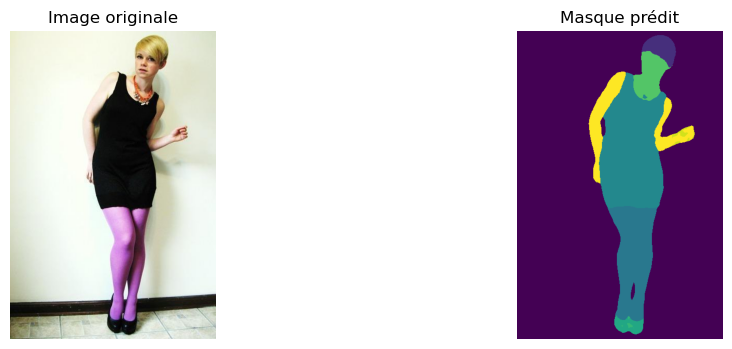

In [57]:
# Affichage du masque obtenu
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(predicted_mask)
plt.title("Masque prédit")
plt.axis("off")

plt.show()

## Etape 4-2 Tester l'ensemble des images du répertoire IMG et sauvegarder les résultats

In [65]:
import time
import re

IMG_DIR = "../assets/top_influenceurs_2024/IMG"
MASK_DIR = "../assets/top_influenceurs_2024/Mask"
SAVE_DIR = "../predictions/api_masks"

os.makedirs(SAVE_DIR, exist_ok=True)

# Fonction de tri numérique pour que image_2.png vienne avant image_10.png
def numerical_sort(value):
    numbers = re.findall(r'\d+', value)
    return int(numbers[0]) if numbers else -1

# Liste triée des images
image_files = sorted(os.listdir(IMG_DIR), key=numerical_sort)

def process_all_images():
    for idx, img_filename in enumerate(image_files):
        print(f"\nImage {idx+1}/{len(image_files)} : {img_filename}")

        # Construction du chemin image
        image_path = os.path.join(IMG_DIR, img_filename)

        # On suppose que le masque correspondant est mask_X.png si l'image est image_X.png
        mask_filename = img_filename.replace("image_", "mask_")
        mask_path = os.path.join(MASK_DIR, mask_filename)

        # Vérification que le masque existe
        if not os.path.exists(mask_path):
            print(f"Masque manquant pour {img_filename} ({mask_filename}), on passe à l'image suivante...")
            continue

        try:
            # Chargement de l'image et du masque GT
            image = Image.open(image_path).convert("RGB")
            gt_mask = Image.open(mask_path)

            # Appel de l'API pour prédire le masque
            pred_mask = predict_segmentation(image)

            # Redimensionner le masque prédit à la taille du masque GT
            pred_mask_resized = Image.fromarray(pred_mask).resize(
                gt_mask.size,
                resample=Image.NEAREST
            )
            pred_mask_resized = np.array(pred_mask_resized)

            # Sauvegarde du masque prédit
            save_path = os.path.join(SAVE_DIR, mask_filename)  # même nom que le GT pour cohérence
            Image.fromarray(pred_mask_resized).save(save_path)

            print(f"Masque prédit et redimensionné sauvegardé dans {SAVE_DIR}.")

            # Temporisation pour éviter les problèmes de rate limit
            time.sleep(1)

        except Exception as e:
            print("Erreur :", e)
            print("On continue avec l'image suivante...")
            continue

In [66]:
# Segmentation de l'ensemble des images de /IMG
process_all_images()


Image 1/50 : image_0.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 2/50 : image_1.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 3/50 : image_2.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 4/50 : image_3.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 5/50 : image_4.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 6/50 : image_5.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 7/50 : image_6.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 8/50 : image_7.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 9/50 : image_8.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 10/50 : image_9.png
Masque prédit et redimensionné sauvegardé dans ../predictions/api_masks.

Image 11

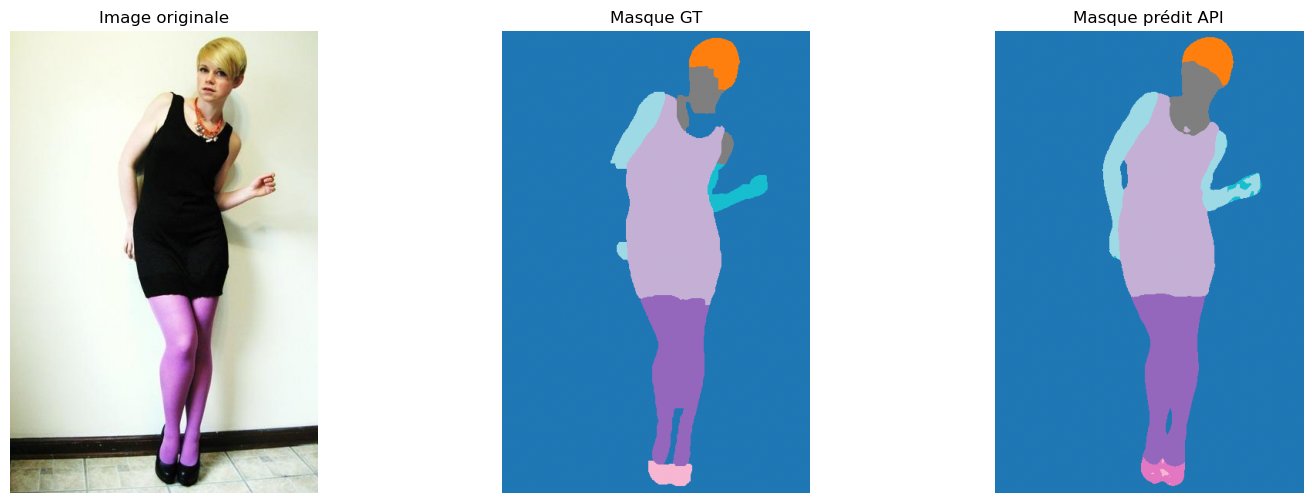

In [68]:
# visualisation des résultats avec l'exemple de image_2.png , son masque ground truth 
# et son masque prédit par le modèle en API

# Chemins
IMG_DIR = "../assets/top_influenceurs_2024/IMG"
MASK_DIR = "../assets/top_influenceurs_2024/Mask"
SAVE_DIR = "../predictions/api_masks"

img_filename = "image_2.png"
mask_filename = "mask_2.png"

# Chargement des images
image = Image.open(os.path.join(IMG_DIR, img_filename)).convert("RGB")
gt_mask = Image.open(os.path.join(MASK_DIR, mask_filename))
pred_mask = Image.open(os.path.join(SAVE_DIR, mask_filename))

# Affichage côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image)
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(gt_mask, cmap='tab20')  # couleurs pour les classes
axes[1].set_title("Masque GT")
axes[1].axis('off')

axes[2].imshow(pred_mask, cmap='tab20')
axes[2].set_title("Masque prédit API")
axes[2].axis('off')

plt.show()

# Etape 5 visualiser et analyser les résultats